# Navigation
---

In this notebook, the navigation project is presented. 

The proposed problem is based on getting an agent to learn to determine which bananas are good and which bad.
For this we have 37 sensors (state), our task will be to find a function that maps the state in the best possible action.

To carry out this mapping, it is proposed to use a neural network with 3 hidden layers.

All the code to facilitate the organization is in the **code** folder. Where we found:
* **agent.py**: The proposed agent to solve the navigation problem.
* **config.py**: Configuration of the hyperparameters of the learning process.
* **models.py**: The proposed neural networks architectures.

The following video shown the agent interaction: https://www.youtube.com/watch?v=CBcbn3_5EgA&feature=youtu.be

### Project dependences

In [1]:
# Import all dependences
import os
import glob
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Unity env
from unityagents import UnityEnvironment

# Project dependences
from code.config import Config
from code.agent import Agent
from code.model import BananasNet

### Init the Unity environment

In [2]:
# Get the unity environment
env = UnityEnvironment(file_name=Config.BANANA_ENV_PATH)

# Select the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Display information about the problem:

In [3]:
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Init the Agent
The proposed agent is prepared to allow as input a custom network architecture. This must have as input the possible states and as output the gains of each possible action based on that state.

The network proposed for this exercise is called **BananasNet**, despite having a funny name is very powerful because it will allow us to navigate autonomously through the scene and get our precious bananas! Mmmmm ...

![BananasNet](doc/banana_arch.png)

In [4]:
agent = Agent(BananasNet, state_size, action_size)

### Main loop
In order to monitoring the learning proces, the following function controls the workflow of the agent.

In [5]:
def dqn(n_episodes=1500, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, 
                       np.array([action]), 
                       np.array([reward]), 
                       next_state, 
                       np.array([done]))
            state = next_state
            score += reward
            if done:
                break 
        
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            agent.save(os.path.join(Config.CHECKPOINT_BANANA_PATH, 'checkpoint_%d.pth') % (i_episode, ))
            
    return scores

In [6]:
# ¡Execute please! ¡I want bananas!
scores = dqn()

Episode 100	Average Score: 0.58
Episode 200	Average Score: 3.80
Episode 300	Average Score: 6.72
Episode 400	Average Score: 8.51
Episode 500	Average Score: 10.98
Episode 600	Average Score: 12.12
Episode 700	Average Score: 13.38
Episode 800	Average Score: 13.55
Episode 900	Average Score: 13.10
Episode 1000	Average Score: 14.03
Episode 1100	Average Score: 13.86
Episode 1200	Average Score: 13.57
Episode 1300	Average Score: 13.37
Episode 1400	Average Score: 13.88
Episode 1500	Average Score: 14.82


### Plot learning curve

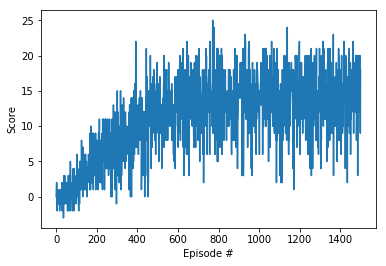

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Play with the last checkpoint
![Banana image](doc/banana.jpg)

In [5]:
model_path = sorted(glob.glob(os.path.join(Config.MODEL_BANANA_PATH, "*.pth")), key=lambda f: os.path.getmtime(f), reverse=True)[0]
#last_weights_path = sorted(glob.glob(os.path.join(Config.CHECKPOINT_BANANA_PATH, "*.pth")), key=lambda f: os.path.getmtime(f), reverse=True)[0]
agent.load(model_path)

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done:
        break
    
print("Score: {}".format(score))

Score: 18.0
